In [1]:
#Installing yfinance library
!pip install yfinance --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
google-api-core 1.33.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 3.19.4 which is incompatible.
gcsfs 2022.5.0 requires fsspec==2022.5.0, but you have fsspec 2022.8.2 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is in

In [2]:
#all the imports and the dependencies required for the noteboo

import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date

In [3]:
# This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
data = yf.Ticker("GOOGL")
#create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
data_hist = data.history(period="max")
# prints the data_hist variable
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.493464,2.594698,2.392727,2.501941,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,173.960007,176.259995,173.649994,175.369995,25389600,0.2,0.0
2024-12-10 00:00:00-05:00,182.850006,186.360001,181.050003,185.169998,54813000,0.0,0.0
2024-12-11 00:00:00-05:00,185.309998,195.610001,184.850006,195.399994,67894100,0.0,0.0


In [4]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 5116 rows and 7 columns


In [7]:
def candlestick(t, o, h, l, c):
    """
    # This function takes in five variables, t (time), o (open price), h (high price), 
    l (low price), c (close price) to plot a candlestick chart. 
    """
    
    # Sets the figure size.
    plt.figure(figsize=(22,5))
    # Sets the color based on whether the close price is greater than the open price.
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    # Plots the absolute difference between open and close prices, from the minimum of the two.
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color)
    # Plots the difference between the high and low price, from the low price.
    plt.bar(x=t, height=h-l, bottom=l, color=color)
    # Hides the Plot grid.
    plt.grid(visible=False)
    # Sets the title of the chart.
    plt.title('Candlestick Chart')

In [5]:
# set start and end dates for the plot
today = date.today()
start = '2020-12-31'
end = today

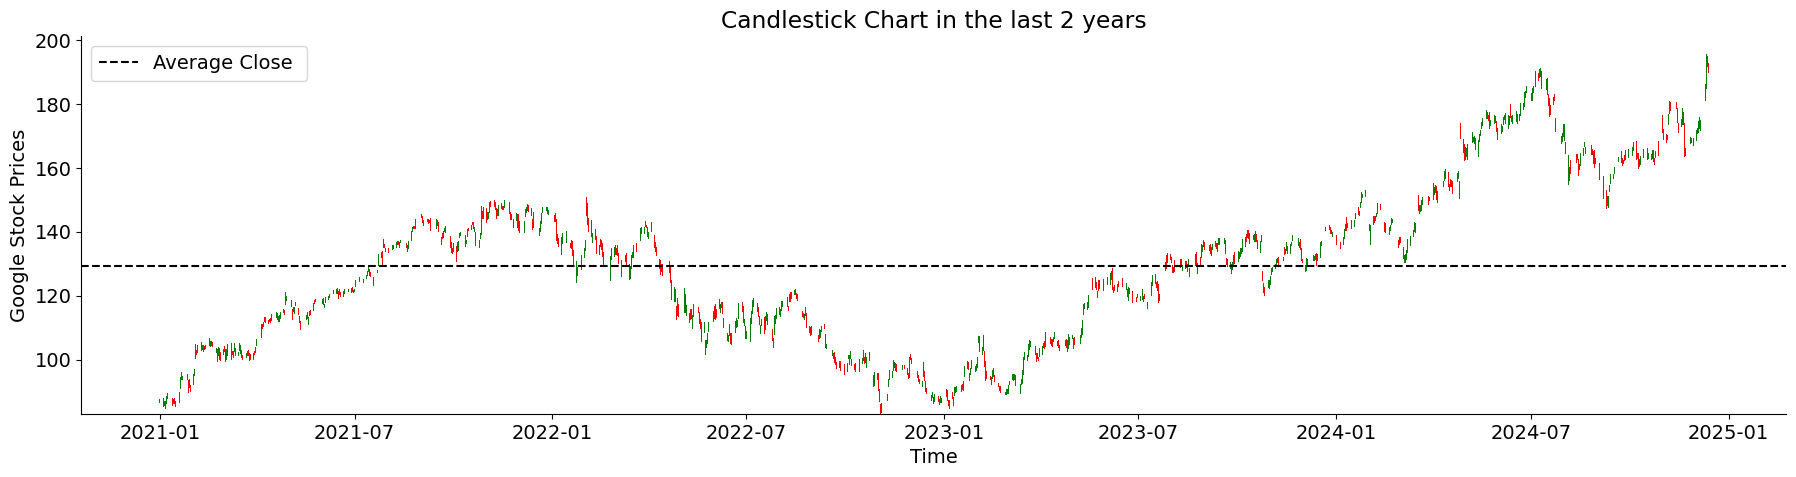

In [8]:
#passing in the index with Open, High, Low And Close Values to the function we created above
candlestick(
    data_hist[start:end].index,
    data_hist[start:end]["Open"],
    data_hist[start:end]["High"],
    data_hist[start:end]["Low"],
    data_hist[start:end]["Close"]
)
plt.axhline(data_hist[start:end]["Close"].mean(), linestyle="--", color='black')
# remove chart spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#adding x axis label
plt.xlabel('Time')
#adding y axis label
plt.ylabel('Google Stock Prices')
#Adding the title to the chart
plt.title('Candlestick Chart in the last 2 years')
#Adding the legend for the average line
plt.legend(['Average Close '])
#showing the plot
plt.show()

In [9]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Date
2004-08-19 00:00:00-04:00    NaN
2004-08-20 00:00:00-04:00    1.0
2004-08-23 00:00:00-04:00    1.0
2004-08-24 00:00:00-04:00    0.0
2004-08-25 00:00:00-04:00    1.0
                            ... 
2024-12-09 00:00:00-05:00    1.0
2024-12-10 00:00:00-05:00    1.0
2024-12-11 00:00:00-05:00    1.0
2024-12-12 00:00:00-05:00    0.0
2024-12-13 00:00:00-05:00    0.0
Name: Close, Length: 5116, dtype: float64

In [10]:
# This code adds a new column called "Target" to the data_hist dataframe. 
#The values in the target column are determined by comparing the current value in the "Close" column with the previous value. 
#If the current value is larger than the previous value, the target column value will be set to True. 
#If the current value is smaller than the previous value, the target column value will be set to False.

data_hist["Target"] = data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [11]:
#Copy the data_hist dataframe and store it in a new dataframe named df
df = data_hist.copy()

#Shift the data in the dataframe by one row
df = df.shift(1)

#Display the first five rows of the shifted df
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-19 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.493464,2.594698,2.392727,2.501941,893181924.0,0.0,0.0,NaN
2004-08-23 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748.0,0.0,0.0,0.0


In [12]:
#Create a list of predictors 
predictors = ["Close", "Volume", "Open", "High", "Low"]

#Select the columns in the data for the predictors and the target
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

#Print the first five rows of the data
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-23 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856.0,1.0
2004-08-24 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512.0,1.0
2004-08-25 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.616890,2.691694,2.609659,2.690696,141897960.0,1.0


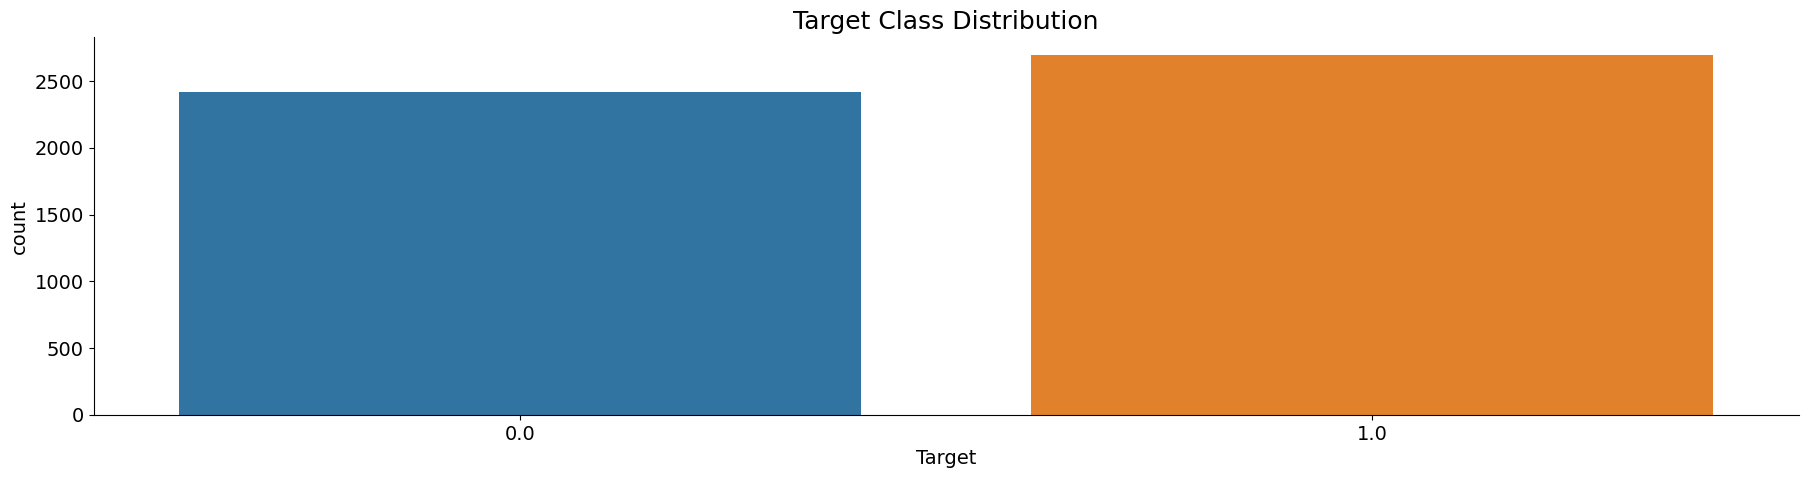

In [13]:
#creates a countplot of the Target column from the dataframe df
sns.countplot(df['Target'])

#removes the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#labels the x-axis of the plot
plt.xlabel('Target')

#adds a title to the plot
plt.title('Target Class Distribution', fontsize=18)

#shows the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Spliting and Resampling Data, Training Model
    
</h2>
</div>
    
</center>

As we saw earlier that there is a slight imbalance in our classes, we will go ahead and resample the data. We are initializing the `RandomOverSampler` object and then resampling our inputs and the targets.

In [14]:
# Initiate a RandomOverSampler object and assigns it to the variable 'ros'.
ros = RandomOverSampler(random_state=0)

# Assigns the feature data to the variable 'X'.
X = df[["Open", "High", "Low", "Close", "Volume"]]

# Assigns the target data to the variable 'y'.
y = df['Target'].values

# Apply RandomOverSampler to the feature and target data then assigns the data to the variables 'X_resampled' & 'y_resampled'.
X_resampled, y_resampled  = ros.fit_resample(X,y)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Countplot of Resampled Classes
    
</h2>
</div>
    
</center>

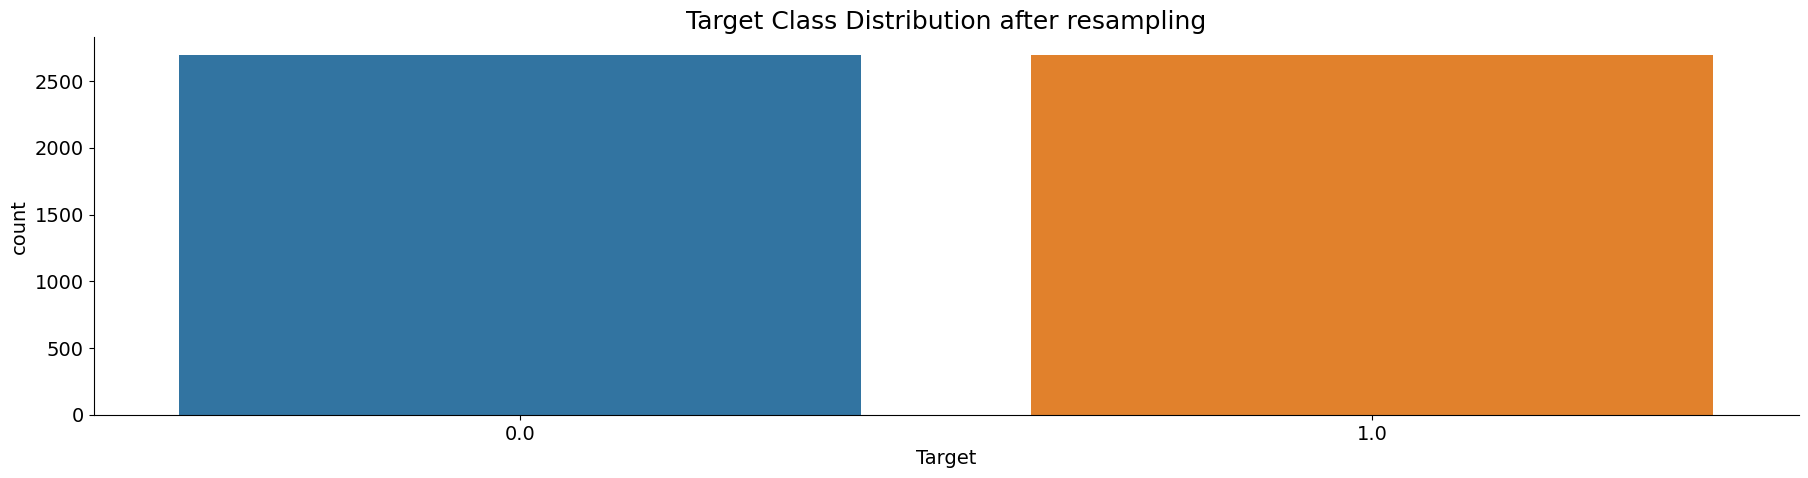

In [15]:
#plotting a countplot of the resampled target values
sns.countplot(y_resampled)
#hiding the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#labeling the x-axis
plt.xlabel('Target')
#adding a title
plt.title('Target Class Distribution after resampling', fontsize=18)
#displaying the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Adding More Predictors to get better precision
    
</h2>
</div>
    
</center>

One of the ways you can increase model performance is **feature engineering** and that's exactly what we are going to do. In the below code cell, we are adding weekly average, quarterly average, yearly average. 

We are also finding if the weekly trend of our target meaning what was the trend of the price during the week. We are also adding bunch of percentages i.e open-close ratio, annual quarterly mean etc. that would give the model more information about the data and the trend.

Read more [here](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning) on feature selection

In [16]:
# Calculate rolling means
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

# Calculate the weekly trend
weekly_trend = df.shift(1).rolling(7).mean()["Target"]

# Compute the rolling mean ratios and other ratios
df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

#Adding Annual and weekly trends
df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

#Calculate ratio of open and close
df["open_close_ratio"] = df["Open"] / df["Close"]

#Calculate ratio of high and close
df["high_close_ratio"] = df["High"] / df["Close"]

#Calculate ratio of low and close
df["low_close_ratio"] = df["Low"] / df["Close"]

In [17]:
df.head()

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,183772044.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.616890,2.691694,2.609659,2.690696,141897960.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882


In [38]:
#iterating over the range of the length of the df DataFrame
for i in range(len(df.columns)):
    #checking if the null value of the particular column is greater than zero
    if df[df.columns[i]].isnull().sum()>0:
        #printing the column number and name that has null values
        print(f'Column {i} {df.columns[i]} null values : {round(df[df.columns[i]].isnull().sum()/df.shape[0]*100,2)}%')

Column 6 weekly_mean null values : 0.12%
Column 7 quarterly_mean null values : 1.74%
Column 8 annual_mean null values : 7.12%
Column 9 annual_weekly_mean null values : 7.12%
Column 10 annual_quarterly_mean null values : 7.12%
Column 11 weekly_trend null values : 0.14%


In [39]:
#filling the missing values with zero
df.fillna(0, inplace=True)

In [40]:
#checking if the values have been filled or not
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Target                   0
weekly_mean              0
quarterly_mean           0
annual_mean              0
annual_weekly_mean       0
annual_quarterly_mean    0
weekly_trend             0
open_close_ratio         0
high_close_ratio         0
low_close_ratio          0
dtype: int64

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white ;">DEEP LEARNING 
    
</h2>
</div>
    
</center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: white;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black ;">Using Neural Network for predictions
    
</h2>
</div>
    
</center>

For a Sequential data like Stock Market, using a model that doesn't use the sequence of the data to predict the values is probably not a good idea because some or the other way we are loosing the information that's hidden in the sequence of the data. 

**Enter Recurrent Neural Network**

Neural Networks are widely used these days for many tasks. Take the example of GMail, the autocompletion feature is there because of the Neural Networks being able to predict the sequence of the next word. The kind of the Neural Networks that enables the predictions is called Recurrent Neural Network.

There are basically 3 types of Recurrent Neural Networks. 

1. **RNN** (Recurrent Neural Networks), 
2. **LSTM** (Long Short Term Memory); and 
3. **GRU** (Gated Recurrent Unit)

RNNs are not used that much because of the vanishing gradient descent problem which basically means the longer the network gets, the earliest neurons stop training because the weights become so small there is hardly any change in them. 

LSTMs and GRUs however have a different mechanism that overcomes this issue of gradient descent. The in-depth working of LSTM and GRUs is beyond the scope of the notebook however the GIF below helps us understand the working of GRU a bit better

**P.s** GRUs are fast and efficient since they have only 2 gates which results in lesser parameters as compared to LSTMs. We are going to be using GRU for the prediction of the Stock Market.

<center> <img src="https://camo.githubusercontent.com/135060228df108b629a4e64e175962552df9d813119769461cb6f9bb30f13bf3/68747470733a2f2f692e696d6775722e636f6d2f3577333775587a2e676966"> </center>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [42]:
df

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,183772044.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.616890,2.691694,2.609659,2.690696,141897960.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972570,1.000371,0.969882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,171.833070,174.879581,171.663266,174.510010,21462400.0,1.0,0.983450,0.947415,0.864013,0.878553,0.911968,0.571429,0.984660,1.002118,0.983687
2024-12-10 00:00:00-05:00,173.960007,176.259995,173.649994,175.369995,25389600.0,1.0,0.983787,0.943088,0.860645,0.874829,0.912581,0.571429,0.991960,1.005075,0.990192
2024-12-11 00:00:00-05:00,182.850006,186.360001,181.050003,185.169998,54813000.0,1.0,0.944383,0.894311,0.816080,0.864140,0.912523,0.571429,0.987471,1.006427,0.977750


In [43]:
#getting rid of the volume and target columns and using these predictors 
predictors  = ['Open', 'High','Low','Close','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [44]:
#creating a new dataframe with the new predictors
NN_df = df[predictors]

In [45]:
NN_df.head()

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,0.0,0.0,0.0,0.0,0.0,0.0,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,0.0,0.0,0.0,0.0,0.0,0.0,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,0.0,0.0,0.0,0.0,0.0,0.0,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,0.0,0.0,0.0,0.0,0.0,0.0,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.616890,2.691694,2.609659,2.690696,0.0,0.0,0.0,0.0,0.0,0.0,0.972570,1.000371,0.969882


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Scaling Input data
    
</h2>
</div>
    
</center>

**Types of scaling in machine learning**

1. **Normalization**: Normalization is a technique used to scale a dataset so that all values are within a similar range, usually between 0 and 1, or -1 and 1. Typically, this is done by subtracting the mean of the dataset from the value of each element and then dividing the result by the standard deviation. 

2. **Standardization**: Standardization is a technique used to scale a dataset so that its mean is 0, and its standard deviation is 1. This is done by subtracting the mean from each value and dividing it by the standard deviation.

3. **Min-Max Scaling**: Min-Max scaling is a technique used to scale a dataset so that the values lie within a defined range. Typically, this range is between 0 and 1, or -1 and 1. Min-Max scaling involves subtracting the minimum value from each element, and then dividing that result by the difference between the maximum and minimum values.

4. **Robust Scaling**: Robust scaling is a technique used to scale a dataset so that it is robust to outliers. It works by subtracting the median of the dataset from each element and then dividing it by the interquartile range. This ensures that the scaling takes into account the outliers, so they don't affect the overall scaling.

In [46]:
#Initiating the MinMaxScaler object
scaler = MinMaxScaler()
#Fitting the data on the NN_df dataframe
scaler.fit(NN_df[NN_df.columns])
#Transforming the values after fitting the data
NN_df[NN_df.columns] = scaler.transform(NN_df[NN_df.columns])

As we can now see that the data is now scaled which is super helpful for faster convergence of a neural network.

In [47]:
NN_df

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,0.000236,0.000948,0.000206,0.001073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072369,0.063719,0.415891
2004-08-24 00:00:00-04:00,0.001497,0.001516,0.001332,0.001214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511416,0.334254,0.974084
2004-08-25 00:00:00-04:00,0.001561,0.001273,0.000610,0.000628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777920,0.575175,0.899585
2004-08-26 00:00:00-04:00,0.000747,0.000808,0.000651,0.000774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389449,0.169106,0.837990
2004-08-27 00:00:00-04:00,0.000746,0.000802,0.000754,0.001021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292438,0.003323,0.756032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-09 00:00:00-05:00,0.879669,0.892629,0.894069,0.891709,0.869010,0.593512,0.424482,0.460292,0.596232,0.571429,0.359009,0.018981,0.867858
2024-12-10 00:00:00-05:00,0.890717,0.899779,0.904567,0.896167,0.869308,0.590801,0.422827,0.458341,0.596633,0.571429,0.399201,0.045485,0.920552
2024-12-11 00:00:00-05:00,0.936892,0.952091,0.943670,0.946969,0.834489,0.560244,0.400933,0.452741,0.596594,0.571429,0.374485,0.057599,0.819765


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Generating Input and Output Data
    
</h2>
</div>
    
</center>

In [48]:
def df_to_X_y2(df, window_size=13):
    """
    Function to convert a dataframe of values into X (data) and y (labels)
    
    Parameters: 
       df: Pandas DataFrame
       window_size: integer representing the size of the window to be used (default 16)
       
    Returns: 
       X: Numpy array of data
       y: Numpy array of labels
    """
    # Convert DataFrame to Numpy array
    df_as_np = df.to_numpy()
    #initiate the empty lists
    X = []
    y = []
    # Iterate through the array, adding the window of values to X and the corresponding label to y
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        #Append the row to X list
        X.append(row)
        label = df_as_np[i+window_size][0]
        #appending the labels to y list
        y.append(label)
    # Return X and y as Numpy arrays
    return np.array(X), np.array(y)

In [49]:
#Generating the X and y values using the function we just created
X, y = df_to_X_y2(NN_df)

print(f'X shape {X.shape} y shape {y.shape}')
print(f'There are {X.shape[0]} samples, {X.shape[1]} timesteps and {X.shape[2]} features in the our data')

X shape (5101, 13, 13) y shape (5101,)
There are 5101 samples, 13 timesteps and 13 features in the our data


In [50]:
y

array([4.32572469e-04, 3.12128367e-04, 9.63570550e-04, ...,
       9.36891913e-01, 9.49669315e-01, 1.00000000e+00])

In [51]:
# Scaling y with a scaler object 
# np.expand_dims(y, axis=1) adding single dimension to y 
# scaler.fit_transform(x) fits the scaler to the data x and return the scaled data 
# np.squeeze(x) remove single dimension to the data x 

y = np.squeeze(scaler.fit_transform(np.expand_dims(y, axis=1)))

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Train Test Split
    
</h2>
</div>
    
</center>

- Train/test split is an **important process** used in machine learning to **assess the performance** of a model on unseen data. 

- By splitting a dataset into two parts, a training set to train the model and a test set to evaluate its performance, we can get a **better understanding** of how well the model generalizes to new data. 

- This process helps us **avoid overfitting**, which occurs when a model performs well on the training set but poorly on the test set due to over-learning the training data.

In [52]:
#Setting the threshold for splitting the data 
threshold = int(X.shape[0] * 0.75)  # 75% of data for training

# 75% of data for training
X_train, y_train = X[:threshold], y[:threshold]

# 25% of data for testing
X_test, y_test = X[threshold:], y[threshold:]

# Print shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3825, 13, 13)
y_train shape: (3825,)
X_test shape: (1276, 13, 13)
y_test shape: (1276,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Building and Training The Model
    
</h2>
</div>
    
</center>

1. **Set up the model architecture**: In this step, we will define the model architecture which will be used for training. We will include one or more layers, the type of layer, the number of neurons, the activation function, and the input shape.

2. **Compile the model**: Next, we will compile the model by specifying the loss function, the optimizer, and any other metrics that we wish to monitor.

3. **Train the model**: Finally, we will train the model by specifying the number of epochs, the batch size, and the training data.

4. **Evaluate the model**: Once the model is trained, we will evaluate it by computing the accuracy and other performance metrics on the validation data.

In [53]:
# Define a Sequential model
model = Sequential()

# Add an input layer with the same shape as the training data
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))

# Add a GRU layer with 64 hidden states
model.add(GRU(64))

# Add a Dense layer with 8 neurons and ReLU activation
model.add(Dense(8, 'relu'))

# Add an output layer with 1 neuron and linear activation
model.add(Dense(1, 'linear'))

# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                15168     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 15,697
Trainable params: 15,697
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Create an early stopping callback to monitor the validation loss
callback = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",
    # Minimum change in loss to qualify as an improvement
    min_delta=0.001,
    # Stop training if no improvement in 3 consecutive epochs
    patience=5,
    # Verbosity mode
    verbose=1,
    # Automatically choose the mode
    mode="auto",
    # Baseline value for the monitored quantity
    baseline=None,
    # Whether to restore model weights from the best epoch
    restore_best_weights=False
)

In [55]:
#Compiling the model 
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=callback)

Epoch 1/100
120/120 [==============================] - 2s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 2.9618e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555
Epoch 3/100
120/120 [==============================] - 0s 4ms/step - loss: 9.7786e-06 - root_mean_squared_error: 0.0031 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 6.7970e-06 - root_mean_squared_error: 0.0026 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1488
Epoch 5/100
120/120 [==============================] - 0s 4ms/step - loss: 5.5582e-06 - root_mean_squared_error: 0.0024 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1495
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: 4.9692e-06 - root_mean_squared_error: 0.0022

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Making Predictions using GRU
    
</h2>
</div>
    
</center>

Things to keep in mind while Making Predictions using GRU

1. **Ensure that your data is normalized**: It is important to ensure that your data is normalized before feeding it into the GRU model. This helps to ensure that the model is not biased towards any particular feature.

2. **Choose an appropriate learning rate**: Choose a learning rate that is not too large or too small. This will help to ensure that the model does not overfit or underfit the data.

3. **Use proper regularization**: Regularization helps to prevent overfitting and underfitting. It is important to use proper regularization techniques such as dropout, L2 regularization, or early stopping to ensure that the model does not overfit or underfit the data.

4. **Tune the model hyperparameters**: It is important to tune the model hyperparameters such as the number of layers, the number of neurons per layer, the optimizer, etc. to ensure that the model is able to generalize well on unseen data.

5. **Use a good validation strategy**: A good validation strategy is important to ensure that the model is able to generalize well on unseen data. It is important to use a good validation strategy such as cross-validation, holdout, or bootstrapping to ensure that the model is able to generalize well.

In [57]:
#using GRU model to predict the values on X_test and then converting the data to 1D array
test_predictions = model.predict(X_test).flatten()
#creating a dataframe to compare the test predictions and actuals
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
#displaying the values
test_results

,Test Predictions,Actuals
0,0.327532,0.331710
1,0.327712,0.330232
2,0.326571,0.326279
3,0.324689,0.323144
4,0.324207,0.324115
...,...,...
1271,0.614542,0.879631
1272,0.612098,0.890682
1273,0.614789,0.936872
1274,0.617810,0.949654


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Plotting Predictions and Actuals
    
</h2>
</div>
    
</center>

- Plotting targets and predictions helps to visualize how well a model is performing and see how closely the predictions are to the target values. It can help to identify errors in the model and examine where additional effort should be focused. 

- Additionally, it can be helpful to compare the performance of a model over time, making it easier to adjust for improved results.

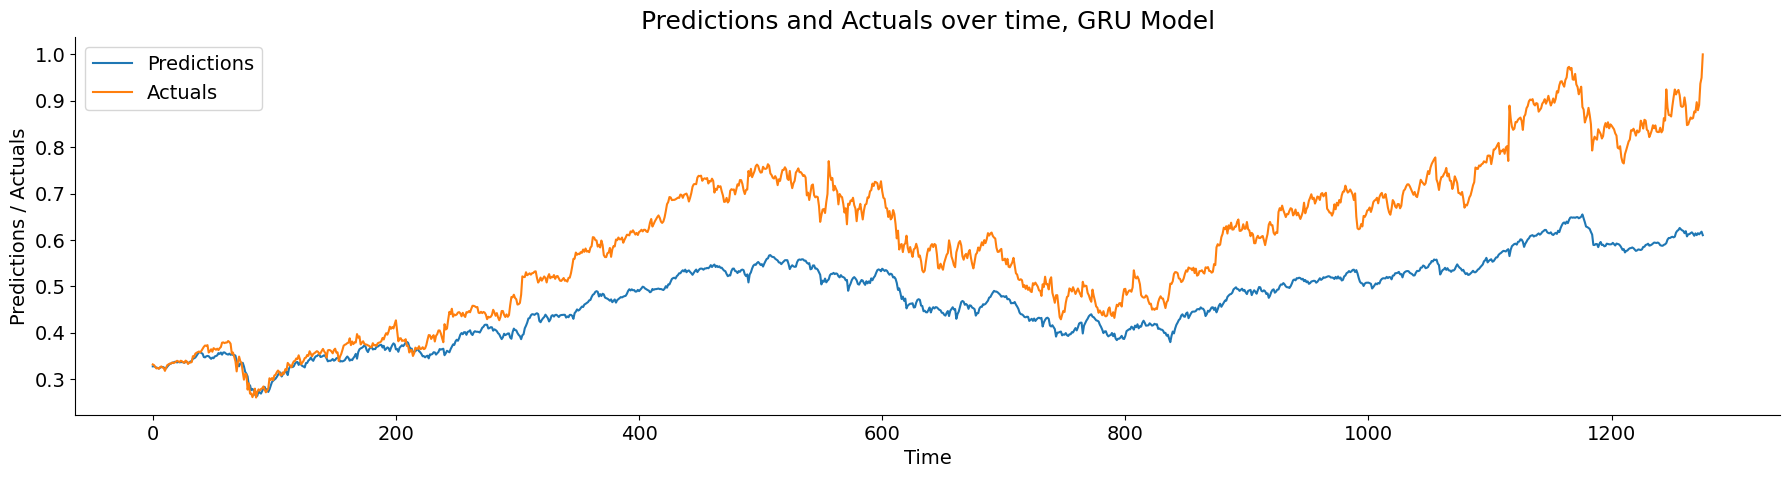

In [58]:
# plot predictions
plt.plot(test_results['Test Predictions']) 
# plot actual values
plt.plot(test_results['Actuals'])
#removing top spine
plt.gca().spines['top'].set_visible(False)
#removing right spine
plt.gca().spines['right'].set_visible(False)
#adding legend to the chart
plt.legend(['Predictions', 'Actuals'])
#setting y-axis label
plt.ylabel('Predictions / Actuals')
#setting x-axis label
plt.xlabel('Time')
#giving the chart title
plt.title('Predictions and Actuals over time, GRU Model', fontsize=18)
#displaying the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Performance Evaluation
    
</h2>
</div>
    
</center>

- Model evaluation is important because it helps to ensure that a machine learning model is working properly and is suitable for its intended purpose. 

- It also helps to identify potential issues with the model, such as overfitting, underfitting, bias, and variance. 

- By performing model evaluation, data scientists can make sure that the model is optimized to best represent the data and is giving accurate predictions. 

- Ultimately, model evaluation helps to improve the accuracy, reliability, and performance of the machine learning model.

In [59]:
print('MSE of the GRU model :', round(mse(test_results['Test Predictions'], test_results['Actuals']),6))

MSE of the GRU model : 0.022224


## Further Reading
1. Predict Stock Prices With Python and Scikit-Learn: Machine Learning Project -  http://bit.ly/3H5inOq
2. Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras - https://bit.ly/3H3uknQ
3. Learn by example RNN/LSTM/GRU time series -  http://bit.ly/3D75H8A
4. Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs - http://bit.ly/3ZUuuql

<p>

THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK. IF YOU LIKED THE WALKTHROUGH, I WOULD APPRECIATE IF YOU COULD LEAVE AN UPVOTE AND FOLLOW ME FOR MORE!!

</p>